# ***`9. This question involves the use of multiple linear regression on the Auto data set`***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.formula.api import ols

# ***`a. Produce a scatterplot matrix which includes all of the variables in the data set.`***

In [ ]:
# Make sure that missing data was processed
Auto_data = pd.read_csv("Auto.csv", na_values="?")
Auto_data = Auto_data.dropna()
Auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


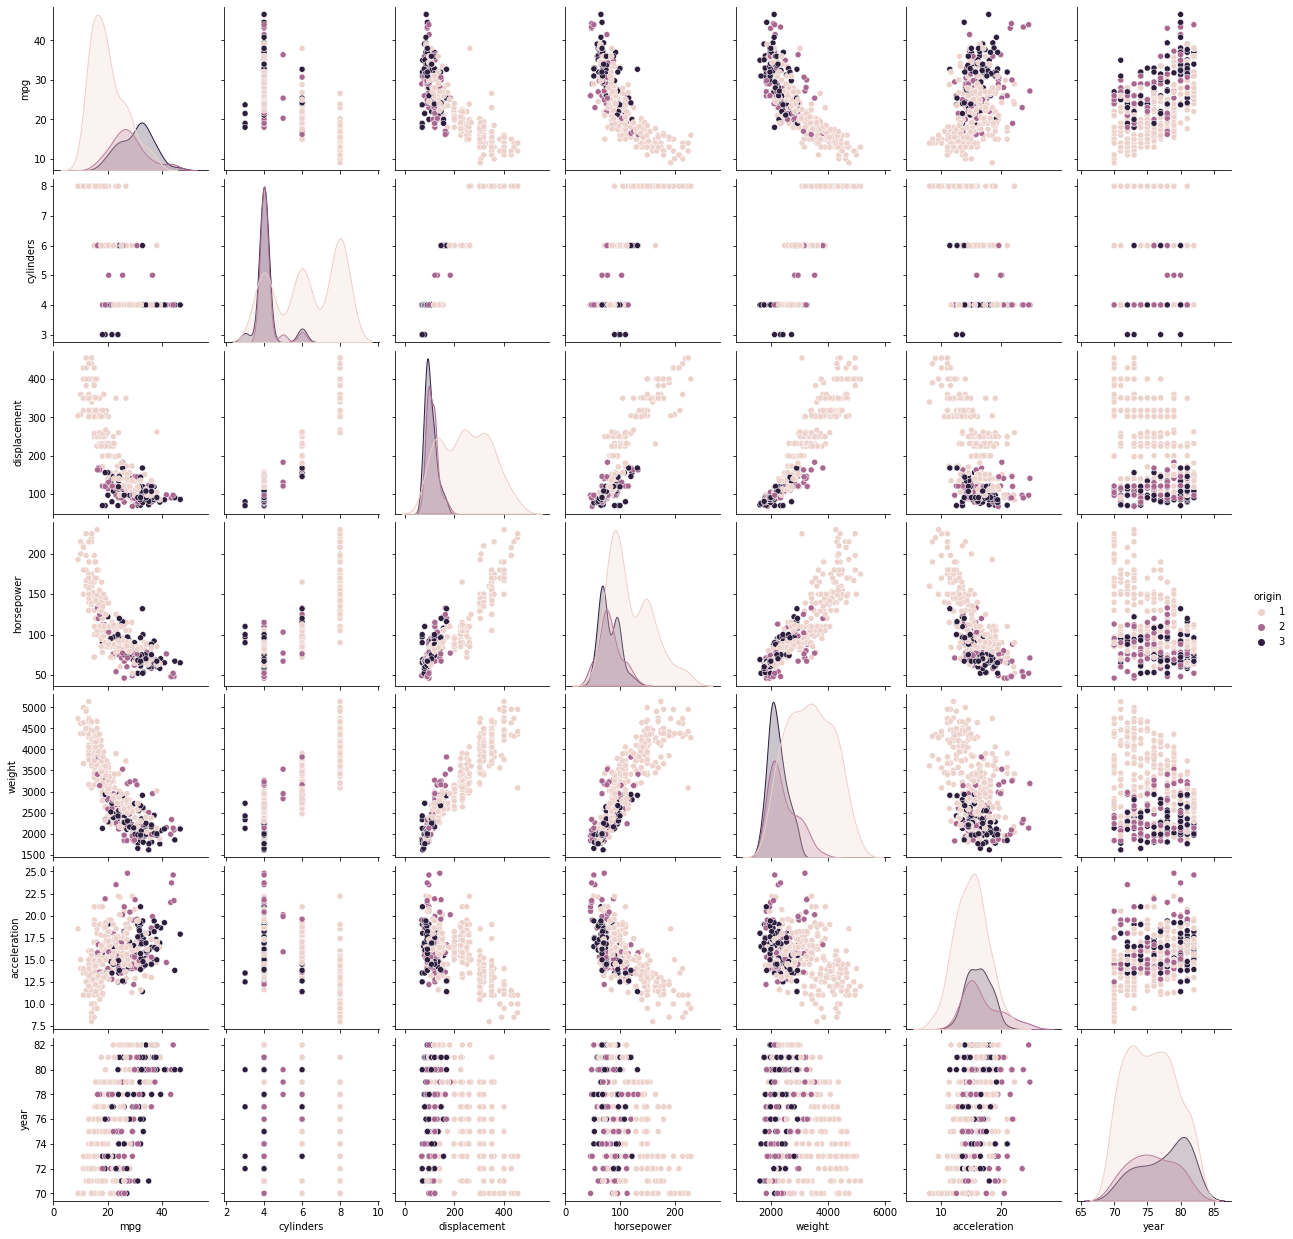

In [ ]:
sn.pairplot(Auto_data, hue = "origin")

# ***`b. Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative`***

In [ ]:
Auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


# ***`c. Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.`***

In [ ]:
Predictors = Auto_data.iloc[:, 1:-1]
response = Auto_data["mpg"]

reg = sm.OLS(response, Predictors)
info = reg.fit()
print(info.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):                        0.00
Time:                        06:51:14   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
# Based on p-value: the displacement, horsepower, weight, year, origin have small p-values => there is a relationship between these predictors and the response
# The coeffienct for the year variable suggest that after one year the mpg will increase by 0.5836

# ***`d. Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?`***

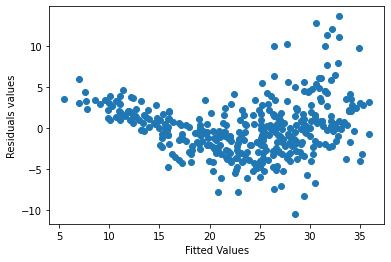

In [ ]:
# Consider Residuals and Fitted
residuals_values = info.resid.values
fitted_values = info.fittedvalues
plt.scatter(fitted_values, residuals_values)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals values")
plt.show()

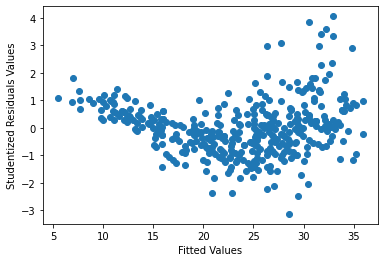

In [ ]:
# Consider Studentized Residuals and Fitted
studentized_Residuals_values = OLSInfluence(info).resid_studentized_internal
fitted_values = info.fittedvalues
plt.scatter(fitted_values, studentized_Residuals_values)
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals Values")
plt.show()

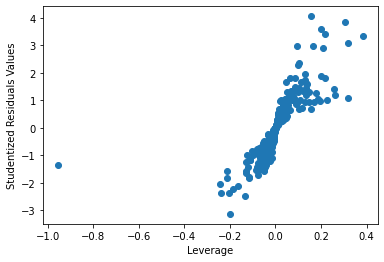

In [ ]:
# Consider Studentized Residuals and Leverage
studentized_Residuals_values = OLSInfluence(info).resid_studentized_internal
leverage_values = OLSInfluence(info).influence
plt.scatter(leverage_values, studentized_Residuals_values)
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals Values")
plt.show()

# e. Use the "*" and ":" symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [ ]:
Auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
lm3_fit = ols('mpg ~ + cylinders * acceleration',data=Auto_data).fit()

lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     202.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           6.64e-79
Time:                        23:07:44   Log-Likelihood:                -1176.8
No. Observations:                 392   AIC:                             2362.
Df Residuals:                     388   BIC:                             2377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31.3719      5.276      5.946      0.000      20.999      41.745
cylinders                 -1.8469      0.856     -2.159      0.032      -3.529      -0.165
acceleration               0.7350      0.337      2.179      0.030       0.072       1.398
cylinders:acceleration    -0.1118      0.058     -1.926      0.055      -0.226       0.002
==============================================================================
Omnibus:                       34.228   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.286
Skew:                           0.668   Prob(JB):                     2.42e-10
Kurtosis:                       3.961   Cond. No.                     1.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm3_fit = ols('mpg ~ + horsepower * acceleration',data=Auto_data).fit()

lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     275.9
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           7.65e-96
Time:                        23:09:27   Log-Likelihood:                -1137.3
No. Observations:                 392   AIC:                             2283.
Df Residuals:                     388   BIC:                             2299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  33.5124      3.420      9.798      0.000      26.788      40.237
horsepower                  0.0176      0.027      0.641      0.522      -0.036       0.072
acceleration                0.8003      0.212      3.777      0.000       0.384       1.217
horsepower:acceleration    -0.0157      0.002     -7.838      0.000      -0.020      -0.012
==============================================================================
Omnibus:                       15.379   Durbin-Watson:                   1.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.778
Skew:                           0.397   Prob(JB):                     0.000138
Kurtosis:                       3.676   Cond. No.                     2.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm3_fit = ols('mpg ~ + horsepower * displacement',data=Auto_data).fit()

lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     381.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          3.00e-115
Time:                        23:09:54   Log-Likelihood:                -1092.1
No. Observations:                 392   AIC:                             2192.
Df Residuals:                     388   BIC:                             2208.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  53.0511      1.526     34.765      0.000      50.051      56.051
horsepower                 -0.2343      0.020    -11.960      0.000      -0.273      -0.196
displacement               -0.0980      0.007    -14.674      0.000      -0.111      -0.085
horsepower:displacement     0.0006   5.19e-05     11.222      0.000       0.000       0.001
==============================================================================
Omnibus:                       46.481   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.417
Skew:                           0.685   Prob(JB):                     1.04e-19
Kurtosis:                       4.865   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm3_fit = ols('mpg ~ + cylinders * displacement',data=Auto_data).fit()

lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     271.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           8.35e-95
Time:                        23:10:41   Log-Likelihood:                -1139.7
No. Observations:                 392   AIC:                             2287.
Df Residuals:                     388   BIC:                             2303.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 48.2204      2.347     20.545      0.000      43.606      52.835
cylinders                 -2.4184      0.535     -4.524      0.000      -3.469      -1.367
displacement              -0.1344      0.016     -8.321      0.000      -0.166      -0.103
cylinders:displacement     0.0118      0.002      5.711      0.000       0.008       0.016
==============================================================================
Omnibus:                       42.283   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.047
Skew:                           0.524   Prob(JB):                     3.45e-24
Kurtosis:                       5.349   Cond. No.                     1.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm3_fit = ols('mpg ~ + horsepower * weight',data=Auto_data).fit()

lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          7.26e-116
Time:                        23:11:25   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.343     27.127      0.000      58.951      68.164
horsepower           -0.2508      0.027     -9.195      0.000      -0.304      -0.197
weight               -0.0108      0.001    -13.921      0.000      -0.012      -0.009
horsepower:weight  5.355e-05   6.65e-06      8.054      0.000    4.05e-05    6.66e-05
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.522
Skew:                           0.577   Prob(JB):                     1.45e-12
Kurtosis:                       4.417   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ***`f. Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.`***

In [ ]:
lm4_fit=ols('mpg ~ + displacement + cylinders^2',data=Auto_data).fit()
lm4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     397.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.08e-94
Time:                        23:19:41   Log-Likelihood:                -1143.2
No. Observations:                 392   AIC:                             2292.
Df Residuals:                     389   BIC:                             2304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        32.4053      0.707     45.837      0.000      31.015      33.795
displacement     -0.0700      0.003    -24.237      0.000      -0.076      -0.064
cylinders ^ 2     0.7065      0.135      5.218      0.000       0.440       0.973
==============================================================================
Omnibus:                       49.661   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.315
Skew:                           0.756   Prob(JB):                     1.81e-19
Kurtosis:                       4.731   Cond. No.                         696.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm4_fit=ols('mpg ~ + horsepower * np.sqrt(acceleration)',data=Auto_data).fit()
lm4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     274.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.91e-95
Time:                        23:19:44   Log-Likelihood:                -1138.3
No. Observations:                 392   AIC:                             2285.
Df Residuals:                     388   BIC:                             2300.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           25.1757      6.783      3.712      0.000      11.840      38.512
horsepower                           0.2074      0.055      3.782      0.000       0.100       0.315
np.sqrt(acceleration)                5.2574      1.696      3.101      0.002       1.924       8.591
horsepower:np.sqrt(acceleration)    -0.1099      0.015     -7.369      0.000      -0.139      -0.081
==============================================================================
Omnibus:                       14.536   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.481
Skew:                           0.389   Prob(JB):                     0.000264
Kurtosis:                       3.634   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm4_fit=ols('mpg ~ + acceleration * np.log(weight)',data=Auto_data).fit()
lm4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     334.9
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          2.77e-107
Time:                        23:19:48   Log-Likelihood:                -1110.7
No. Observations:                 392   AIC:                             2229.
Df Residuals:                     388   BIC:                             2245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     174.8866     34.785      5.028      0.000     106.495     243.278
acceleration                    1.7087      2.235      0.764      0.445      -2.686       6.103
np.log(weight)                -19.6051      4.321     -4.538      0.000     -28.100     -11.110
acceleration:np.log(weight)    -0.1779      0.279     -0.638      0.524      -0.727       0.371
==============================================================================
Omnibus:                       36.512   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.806
Skew:                           0.641   Prob(JB):                     2.07e-12
Kurtosis:                       4.284   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""